In [159]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams["figure.figsize"] = "15, 8"

import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
#http://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [8]:
lines = []
with open('sotu.txt') as f:
    for line in f:
        lines.append(line.strip())

lines = [line for line in lines if line != '\n' and line != '']
lines.append('')

stars = [i for i, x in enumerate(lines) if x == '***']
# last line of file
stars.append(len(lines) - 1)

def president(i):
    return ' '.join(lines[stars[i] + 2 : stars[i] + 3]).strip()

def date(i):
    return ' '.join(lines[stars[i] + 3 : stars[i] + 4]).strip()

def speech(i):
    return ' '.join(lines[stars[i] + 4 : stars[i + 1]]).strip()

In [43]:
def rolling_similarity(end_time):
    similarities = []
    for i in range(end_time):
        similarities.append(cosine_sim(speech(i), speech(i + 1)))
    return similarities

In [44]:
diff_one_series = rolling_similarity(223)

In [106]:
years = []
for i in range(224):
    years.append(date(i)[-4:])

In [176]:
df = pd.DataFrame()
dfs = []
for i, year in enumerate(years):
    print(year)
    first = speech(i)
    temp_dist = []
    temp_df = pd.DataFrame()
    for j, _ in enumerate(years):
        if j < i:
            temp_dist.append(-1)
        else:
            temp_dist.append(cosine_sim(first, speech(j)))
    temp_df[year] = temp_dist
    dfs.append(temp_df)
df = pd.concat(dfs, axis=1)

1790
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1953
1954
1955
1956
1957
1958
1959
1960
1961
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1990
1991
1992


In [178]:
df.to_csv("cosine.csv", index=False)

In [179]:
df.as_matrix()
# Generate a mask for the upper triangle
mask = np.zeros_like(df.as_matrix(), dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

In [182]:
m = df.as_matrix()

In [185]:
# copy lower triangle to upper triangle
for i in range(m.shape[0]):
    for j in range(i, m.shape[1]):
        m[i][j] = m[j][i]

(array([   0.5,   10.5,   20.5,   30.5,   40.5,   50.5,   60.5,   70.5,
          80.5,   90.5,  100.5,  110.5,  120.5,  130.5,  140.5,  150.5,
         160.5,  170.5,  180.5,  190.5,  200.5,  210.5,  220.5]),
 <a list of 23 Text xticklabel objects>)

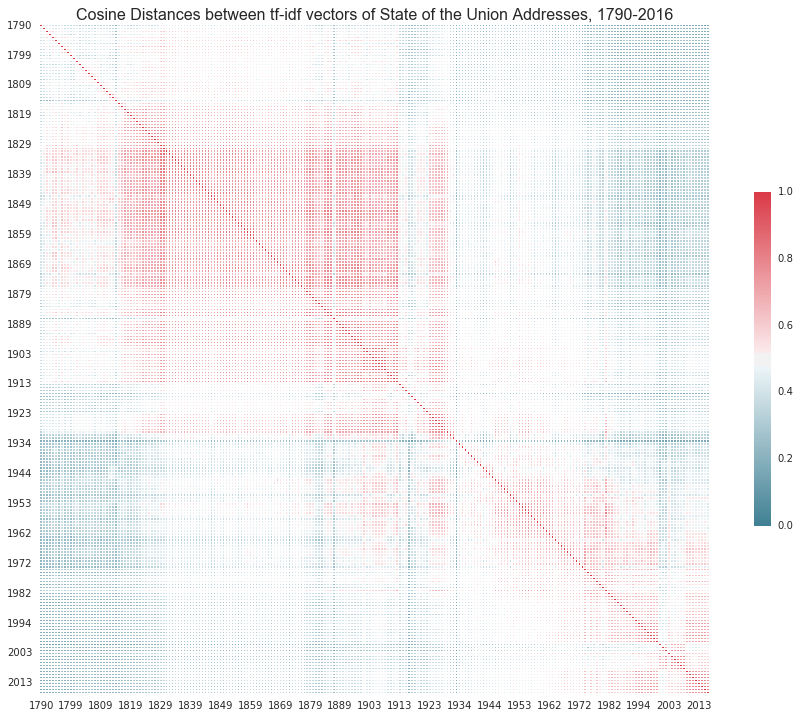

In [289]:
# Set up matplotlib figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax.set_title('Cosine Distances between tf-idf vectors of State of the Union Addresses, 1790-2016', fontsize=16)

temp = pd.DataFrame(m, columns=years)
temp.index = years
# Create the seaborn heatmap with the upper triangle masked
heatmap = sns.heatmap(temp, annot=False, cmap=cmap, vmax=1, vmin=0,xticklabels=10, yticklabels=10,
                      linewidths=.5, square=True, cbar_kws={"shrink": .5}, ax=ax)
# Make the axis labels legible
plt.yticks(rotation=360)
plt.xticks(rotation=360)

In [199]:
np.array(df.columns.values, dtype=np.int32)

array([1790, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799,
       1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832,
       1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
       1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
       1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1897, 1898, 1899, 1900, 1901, 1902,
       1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 19

(array([   0.5,   10.5,   20.5,   30.5,   40.5,   50.5,   60.5,   70.5,
          80.5,   90.5,  100.5,  110.5,  120.5,  130.5,  140.5,  150.5,
         160.5,  170.5,  180.5,  190.5,  200.5,  210.5,  220.5]),
 <a list of 23 Text xticklabel objects>)

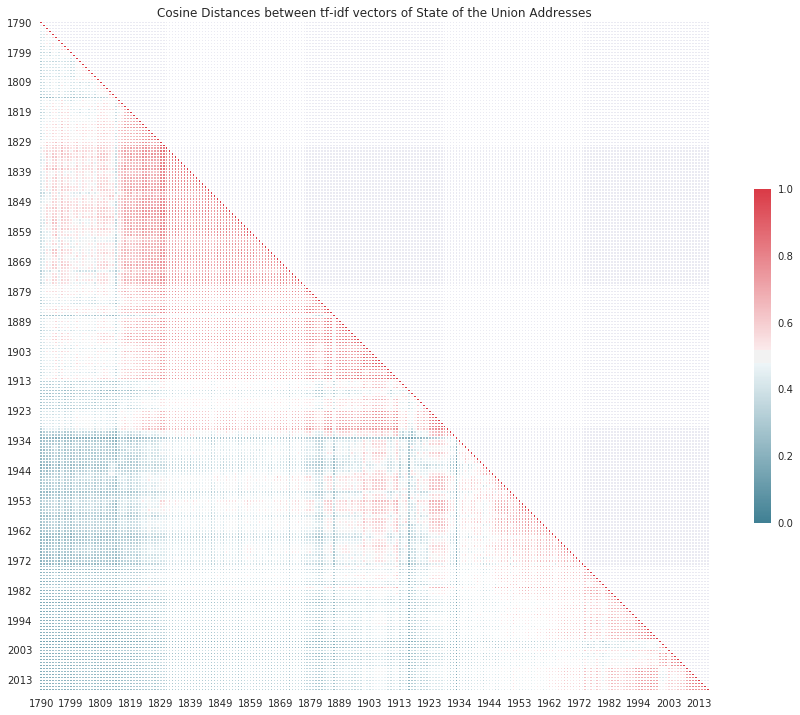

In [273]:
# Set up matplotlib figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax.set_title('Cosine Distances between tf-idf vectors of State of the Union Addresses')

# Create the seaborn heatmap with the upper triangle masked
heatmap = sns.heatmap(temp, annot=False, cmap=cmap, vmax=1, mask=mask, vmin=0,xticklabels=10, yticklabels=10,
                      linewidths=.5, square=True, cbar_kws={"shrink": .5}, ax=ax)
# Make the axis labels legible
plt.yticks(rotation=360)
plt.xticks(rotation=360)

In [96]:
np.sort(diff_one_series)[:-1][:10]

array([ 0.26909885,  0.34253401,  0.41171552,  0.41380018,  0.43810108,
        0.45164537,  0.45481508,  0.45583735,  0.46047781,  0.46178195])

In [214]:
pd.DataFrame(m, columns=years).to_csv("distances.csv", index=False)

(array([   0.5,   10.5,   20.5,   30.5,   40.5,   50.5,   60.5,   70.5,
          80.5,   90.5,  100.5,  110.5,  120.5,  130.5,  140.5,  150.5,
         160.5,  170.5,  180.5,  190.5,  200.5,  210.5,  220.5]),
 <a list of 23 Text xticklabel objects>)

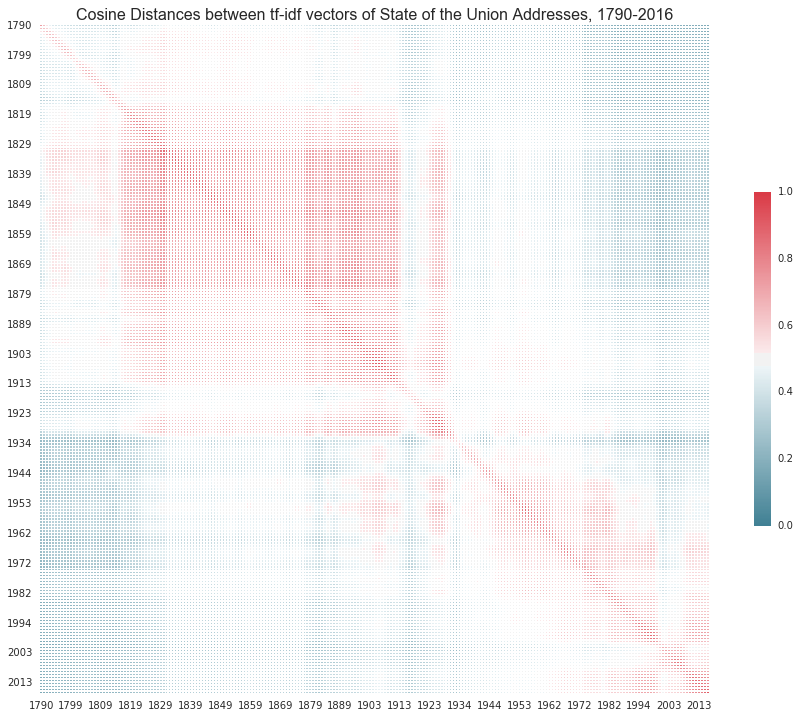

In [291]:
# Set up matplotlib figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax.set_title('Cosine Distances between tf-idf vectors of State of the Union Addresses, 1790-2016', fontsize=16)

# Gaussian filter applied to cosine distance matrix to smooth differences
# order of 0 corresponds to a convolution with the Gaussian kernel
temp = pd.DataFrame(scipy.ndimage.filters.gaussian_filter(m, 1, order=0), columns=years)
temp.index = years
# Create the seaborn heatmap with the upper triangle masked
heatmap = sns.heatmap(temp, annot=False, cmap=cmap, vmax=1, vmin=0,xticklabels=10, yticklabels=10,
                      linewidths=.5, square=True, cbar_kws={"shrink": .5}, ax=ax)
# Make the axis labels legible
plt.yticks(rotation=360)
plt.xticks(rotation=360)